In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/week-1-ml-andrew-ng/ex1data1.txt
/kaggle/input/week-1-ml-andrew-ng/ex1data2.txt


# Programming Exercise 1: Linear Regression

## 2 Linear regression with one variable

In [2]:
df1 = pd.read_csv('../input/week-1-ml-andrew-ng/ex1data1.txt', header=None)
df1.columns = ['population', 'profit']

df1: 
each row is data for one city where there's one food truck

column 'population' refers to the population size in 10,000s

column 'profit' refers to the profit of the food truck in that city in $10,000s

In [3]:
df1.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 2.1 Plotting the data

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib notebook

In [5]:
def plotData(X, y):
    ax = sns.regplot(x = X, y = y, 
                     fit_reg=False, marker = 'x', color = 'r', scatter_kws={"s": 40})
    ax.set(xlabel = 'Population of City in 10,000s', ylabel = 'Profit in $10,000s')
    

plotting data ...



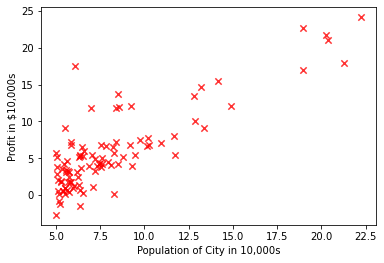

In [6]:
print('plotting data ...\n')
data = df1
X = data['population'] #data.iloc[:,0]
y = data['profit'] #data.iloc[:,1]
m = len(y) #number of training examples

plotData(X, y)

### 2.3 Gradient Descent

TODO section

In [7]:
def computeCost(X, y, theta):
    '''
    COMPUTECOST Compute cost for linear regression
    J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    X - design matrix - with x_0^i set to 1
    theta - np array
    '''
    #Initialize some useful values
    m = len(y)
    
    # make sure shape is right
    y = np.array(y).reshape(m,1)
    theta = theta.reshape(2,1)
    
    y_hat = X @ theta
    
    J = np.sum(np.power(y_hat-y, 2))/(2*m) #OLS - ordinary least square
    
    return J

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    GRADIENTDESCENT Performs gradient descent to learn theta
    
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    
    theta: 2d array with shape (n+1,1)
    '''
    # Initialize some useful values
    m = len(y)
    J_history = np.zeros(num_iters)
    y = np.array(y).reshape(m,1)
    #print(theta)

    for iter in np.arange(num_iters):
        '''
        Perform a single gradient step on the parameter vector theta. 
        '''
        y_hat = X @ theta
        theta = theta - (alpha*(y_hat-y).T @ X/m).T
        #print(iter, theta)
        
        # Save the cost J in every iteration    
        J_history[iter] = computeCost(X, y, theta)
        #print(computeCost(X, y, theta))
    
    ax = sns.lineplot(x = np.arange(num_iters), y = J_history)
    ax.set(xlabel = 'Number of iterations', ylabel = 'J(theta)')
        
    return theta


Test section

Running Gradient Descent ...

Theta found by gradient descent: -3.6303 1.1664



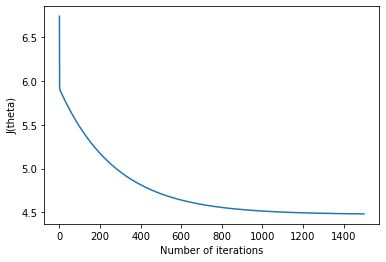

In [9]:
print('Running Gradient Descent ...\n')

X = np.hstack([np.ones((m,1)), np.array(data.iloc[:,0]).reshape(m,1)]) # Add a column of ones to x
theta = np.zeros((2,1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01 #learning rate

# compute and display initial cost
computeCost(X, y, theta)

# run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations)
#print(theta)

# print theta to screen
print('Theta found by gradient descent: {0[0]:.4f} {0[1]:.4f}\n'.format(theta.flatten().tolist()))

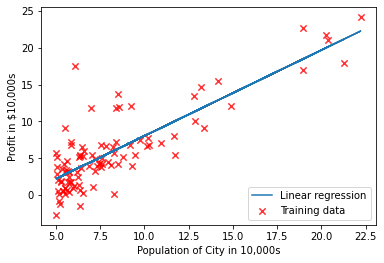

In [10]:
# Plot the linear fit
# keep previous plot visible
plotData(X[:,1], y)
y_hat = X @ theta
plt.plot(X[:,1], y_hat, '-')
plt.legend(("Linear regression", "Training data"), loc = 'lower right')

In [11]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] @ theta;
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1[0]*10000))
predict2 = [1, 7] @ theta;
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2[0]*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



### 2.4 Visualizing $J(\theta)$

In [12]:
print('Visualizing J(theta_0, theta_1) ...\n')

# Grid over which we will calculate J
'''
np.linspace - Return evenly (linearly) spaced numbers over a specified interval
initiate a grid to plot J(theta)
'''
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in np.arange(len(theta0_vals)):
    for j in np.arange(len(theta1_vals)):
        t = np.asarray([theta0_vals[i], theta1_vals[j]]);    
        J_vals[i,j] = computeCost(X, y, t);

Visualizing J(theta_0, theta_1) ...



surface plot and contour plot

Text([-3.63029144], [1.16636235], 'x')

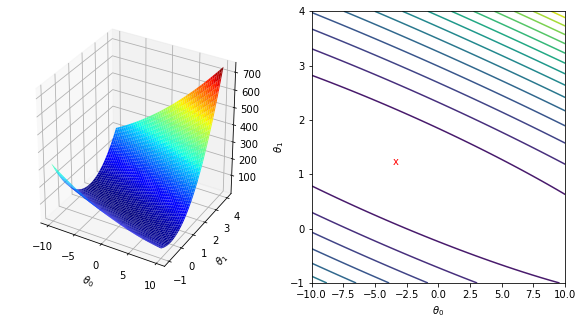

In [13]:
from mpl_toolkits.mplot3d import Axes3D
theta0_plot, theta1_plot = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(1,2,1, projection = '3d')
#ax1 = fig.gca(projection = '3d')
ax1.plot_surface(theta0_plot, theta1_plot, J_vals.T, cmap='jet') # not sure about transpose here
ax1.set(xlabel = r'$\theta_0$', ylabel = r'$\theta_1$')

ax2 = fig.add_subplot(1,2,2)
ax2.contour(theta0_plot, theta1_plot, J_vals.T, 15)
ax2.set(xlabel = r'$\theta_0$', ylabel = r'$\theta_1$')
ax2.text(theta[0], theta[1], 'x', c = 'r')

## 3 Linear regression with multiple variables

training dataset: Housing prices in Portland, Oregon

In [14]:
# Load Data
df2 = pd.read_csv('../input/week-1-ml-andrew-ng/ex1data2.txt', header=None)
df2.columns = ['size', 'number_of_bedrooms', 'price']
df2.head()

data = df2
X = np.array(data.iloc[:,0:2]) # m x n
y = np.array(data.iloc[:,2]) # m
m = len(y)

size - in square feet


### 3.1 Feature normalization

TODO section

In [15]:
def featureNormalize(X):
    '''
    FEATURENORMALIZE(X) returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    '''
    
    mu = np.mean(X, axis = 0) # mean by column
    sigma = np.std(X, axis = 0)
    
    
    X_norm = (X - mu)/sigma
    
    return(X_norm, mu, sigma)


Test section

In [16]:
# Scale features and set them to zero mean
print('Normalizing Features ...\n')

X, mu, sigma = featureNormalize(X)

# Add intercept term to X
X = np.hstack([np.ones((m,1)), X]) # Add a column of ones to x

Normalizing Features ...



### 3.2 Gradient descent

TODO section

In [17]:
def computeCostMulti(X, y, theta):
    '''
    Compute cost for linear regression with multiple variables
    
    J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    X - design matrix (m, n+1)
    '''
    #Initialize some useful values
    m = len(y) # number of training examples
    
    # make sure shape is right
    y = np.array(y).reshape(m,1)
    theta = theta.reshape(3,1)
    
    y_hat = X @ theta
    
    J = (y_hat - y).T @ (y_hat - y)/(2*m) #OLS - ordinary least square
    
    return J
    

In [18]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    ''' 
    Performs gradient descent to learn theta
    updates theta by taking num_iters gradient steps with learning rate alpha
    '''
    
    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))
    y = np.array(y).reshape(m,1)
    
    for iter in np.arange(num_iters):
        '''
        Perform a single gradient step on the parameter vector theta.
        '''
        y_hat = X @ theta
        theta = theta - (alpha*(y_hat-y).T @ X/m).T
        #print(iter, theta)
        
        # Save the cost J in every iteration    
        J_history[iter] = computeCostMulti(X, y, theta)
        
    return (theta, J_history)


Test section

Running gradient descent ...

Theta computed from gradient descent: 
 338658.25, 103322.83, -474.74 



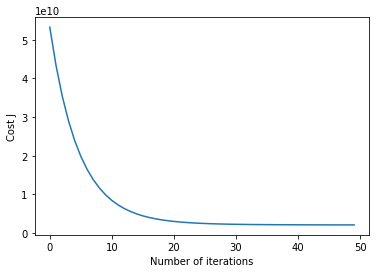

In [19]:
'''
After that, try running gradient descent with different values of alpha 
and see which one gives you the best result.

Hint: At prediction, make sure you do the same feature normalization.
'''               
print('Running gradient descent ...\n')

# Choose some alpha value
alpha = 0.1
num_iters = 50

# Init Theta and Run Gradient Descent ?????
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)


# Plot the convergence graph
ax = sns.lineplot(x = np.arange(num_iters), y = J_history.flatten())
ax.set(xlabel = 'Number of iterations', ylabel = 'Cost J')
    
    
# Display gradient descent's result
print('Theta computed from gradient descent: \n {0[0]:.2f}, {0[1]:.2f}, {0[2]:.2f} \n'.format(theta.flatten().tolist()))

In [20]:
# Estimate the price of a 1650 sq-ft, 3 br house
'''
Recall that the first column of X is all-ones. Thus, it doesnot need to be normalized.
''' 
x_new = np.hstack([1, (np.array([1650, 3]) - mu)/sigma]).reshape(1,3)

price = (x_new @ theta).flatten()[0]


print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ${:.2f}\n'.format(price))


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $292679.07



### 3.3 Normal equations

TODO section

In [21]:
def normalEqn(X, y):
    '''
    NORMALEQN(X,y) computes the closed-form solution to linear regression using the normal equations
    X: design matrix (m, n+1)
    '''
    y = np.array(y).reshape(m,1)
    
    theta = np.linalg.inv(X.T @ X) @ X.T @ y

    return theta

Test section

In [22]:
print('Solving with normal equations...\n');
'''
The following code computes the closed form solution for linear regression using the normal equations. 
'''

# Calculate the parameters from the normal equation
theta = normalEqn(X, y)

# Display normal equation's result
print('Theta computed from gradient descent: \n {0[0]:.2f}, {0[1]:.2f}, {0[2]:.2f} \n'.format(theta.flatten().tolist()))

# Estimate the price of a 1650 sq-ft, 3 br house
'''
Recall that the first column of X is all-ones. Thus, it doesnot need to be normalized.
''' 
x_new = np.hstack([1, (np.array([1650, 3]) - mu)/sigma]).reshape(1,3)

price = (x_new @ theta).flatten()[0]

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ${:.2f}\n'.format(price))



Solving with normal equations...

Theta computed from gradient descent: 
 340412.66, 109447.80, -6578.35 

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293081.46

